# Tarefa 1 - Pré-Processamento
## Nome: Paulo Yamagishi | DRE: 121072893



## Parte I - Importando a Base de Dados

In [1]:
# importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
# importando o dataset
df = pd.read_csv('imdb_top_2000_movies.csv')

In [3]:
# visualizando as primeiras linhas do dataset
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


In [4]:
# verificando as features e os tipos de dados   
df.dtypes

Movie Name       object
Release Year     object
Duration          int64
IMDB Rating     float64
Metascore       float64
Votes            object
Genre            object
Director         object
Cast             object
Gross            object
dtype: object

### Facilitando o trabalho:
Alguns atributos de natureza numérica estão com o tipo "object", para tornar as operaões mais simples, realizarei uma troca de tipos.


In [5]:
# Formatando a coluna 'Votes' para int
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
# Formatando a coluna 'Gross' para float
df['Gross'] = df['Gross'].str.replace('$', '').str.replace('M', '').astype(float)
# Formatando a coluna 'Relese Year ' para int
df['Release Year'] = df['Release Year'].str.replace('I', '').str.replace('1964–1968', '1964').str.replace('1995–2016', '1995').str.replace('Video', '').str.replace('TV Movie', '').astype(int)

In [6]:
# Checando os tipos de dados
df.dtypes

Movie Name       object
Release Year      int32
Duration          int64
IMDB Rating     float64
Metascore       float64
Votes             int32
Genre            object
Director         object
Cast             object
Gross           float64
dtype: object

### Eliminando dados duplicados

In [7]:
# Eliminando dados duplicados
df = df.drop_duplicates()

### Tratando Nulos

In [8]:
# Verificando se existem valores nulos
df.isnull().sum()

Movie Name       0
Release Year     0
Duration         0
IMDB Rating      0
Metascore       81
Votes            0
Genre            0
Director         0
Cast             0
Gross           97
dtype: int64

Percebemos que os atributos 'Metascore' e 'Gross' possuem atributos NaN. Dessa forma, é necessário preencher com a média ou mediana. 
Assim para tomar a decisão, realizarei o plot do histograma das features.

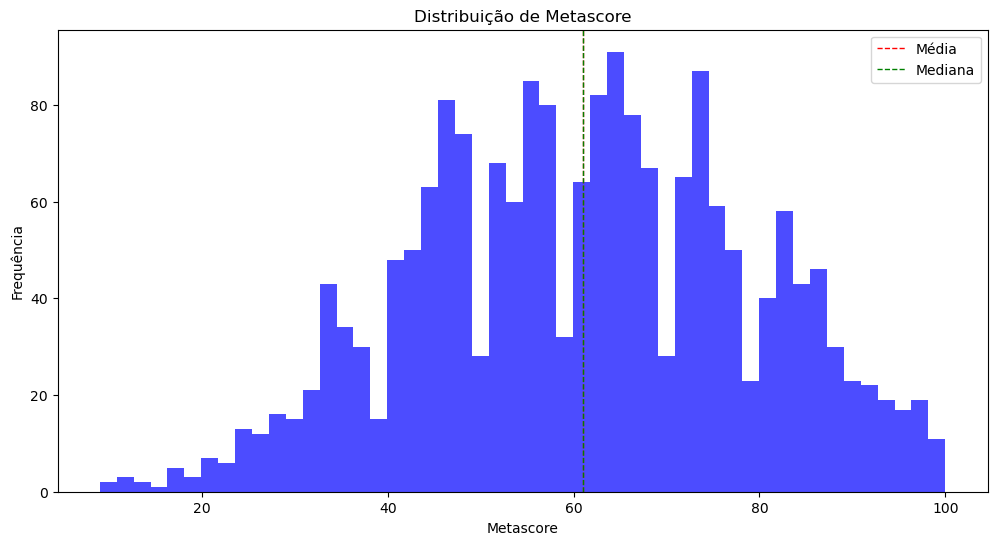

In [9]:
# Plotando o histograma da coluna 'Metascore', destacando a média e a mediana
plt.figure(figsize=(12,6)) 
plt.hist(df['Metascore'], bins=50, color='blue', alpha=0.7)
plt.axvline(df['Metascore'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['Metascore'].median(), color='green', linestyle='dashed', linewidth=1)
plt.title('Distribuição de Metascore')
plt.xlabel('Metascore')
plt.ylabel('Frequência')

# Legenda
plt.legend({'Média':df['Metascore'].mean(),'Mediana':df['Metascore'].median()})

plt.show()

Como possuímos uma distribuição mais simétrica, preencherei os NaN com a média.

In [10]:
# Substituindo os NaN da coluna 'Metascore' pela média
df['Metascore'] = df['Metascore'].fillna(df['Metascore'].mean())

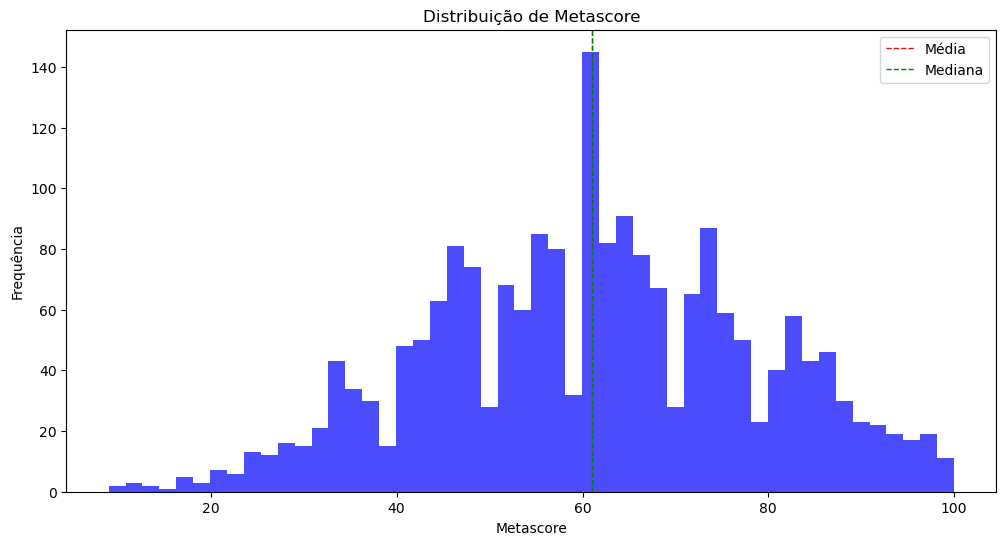

In [11]:
# Realizando o plot do histograma da coluna 'Metascore' após a substituição dos NaN
plt.figure(figsize=(12,6))
plt.hist(df['Metascore'], bins=50, color='blue', alpha=0.7)
plt.axvline(df['Metascore'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['Metascore'].median(), color='green', linestyle='dashed', linewidth=1)
plt.title('Distribuição de Metascore')
plt.xlabel('Metascore')
plt.ylabel('Frequência')

# Legenda
plt.legend({'Média':df['Metascore'].mean(),'Mediana':df['Metascore'].median()})
plt.show()

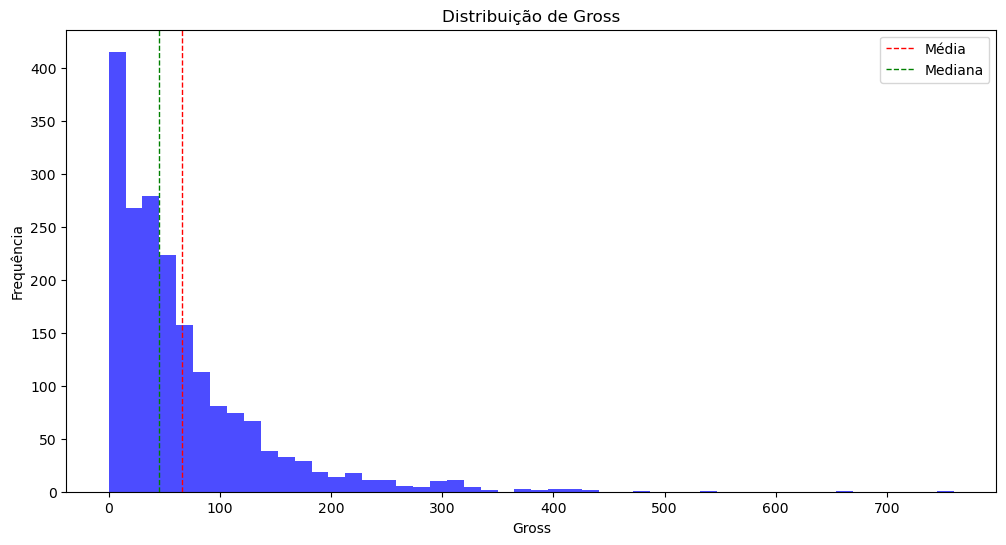

In [12]:
# Plotando o histograma da coluna 'Gross', destacando a média e a mediana
plt.figure(figsize=(12,6))
plt.hist(df['Gross'], bins=50, color='blue', alpha=0.7)
plt.axvline(df['Gross'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['Gross'].median(), color='green', linestyle='dashed', linewidth=1)
plt.title('Distribuição de Gross')
plt.xlabel('Gross')
plt.ylabel('Frequência')

# Legenda
plt.legend({'Média':df['Gross'].mean(),'Mediana':df['Gross'].median()})

plt.show()

Como possuímos uma distribuição mais assimétrica, preencherei os NaN com a mediana.

In [13]:
# Substituindo os NaN da coluna 'Metascore' pela mediana
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

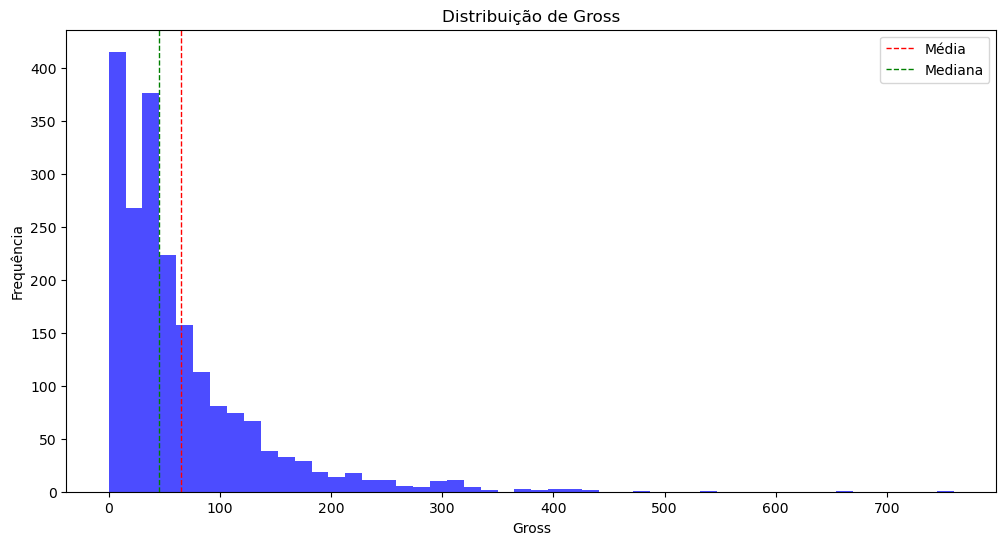

In [14]:
# Realizando o plot do histograma da coluna 'Gross' após a substituição dos NaN
plt.figure(figsize=(12,6))
plt.hist(df['Gross'], bins=50, color='blue', alpha=0.7)
plt.axvline(df['Gross'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['Gross'].median(), color='green', linestyle='dashed', linewidth=1)
plt.title('Distribuição de Gross')
plt.xlabel('Gross')
plt.ylabel('Frequência')

# Legenda
plt.legend({'Média':df['Gross'].mean(),'Mediana':df['Gross'].median()})
plt.show()

## Parte II - Trabalhando com o Banco de Dados

### Medidas de Posição e Dispersão
Vamos fazer a análise nos atributos numéricos: Duração do Filme e IMBD Rating 

#### Duration


##### Média, Mediana, Moda - Variância, Desvio Padrão e z-score

In [15]:
# Calculando a média, mediana e moda da feature 'IMDB RAting'
mediaDuracao = df['Duration'].mean()
medianaDuracao = df['Duration'].median()
modaDuracao = stats.mode(df['Duration'], keepdims=True)

# Calculando a variância e o desvio padrão da feature 'Duration'
varianciaDuracao = df['Duration'].var()
desvioPadraoDuracao = df['Duration'].std()

# Calculando o z-score da feature 'IMDB RAting'
zScoreDuracao = stats.zscore(df['Duration'])

# Printando as estatísticas
print('Média:', mediaDuracao)
print('Mediana:', medianaDuracao)
# A moda retorna um array com a moda e a quantidade de vezes que ela aparece
print('Moda - Tempo:', modaDuracao[0][0], 'Quantidade:', modaDuracao[1][0])
print('Variância:', varianciaDuracao)
print('Desvio Padrão:', desvioPadraoDuracao)
print('Z-Score:', zScoreDuracao)

Média: 113.939
Mediana: 110.0
Moda - Tempo: 104 Quantidade: 53
Variância: 526.5205392696336
Desvio Padrão: 22.946035371489202
Z-Score: 0       2.661735
1       3.838703
2       0.438573
3       4.536166
4      -0.040932
          ...   
1995   -0.389664
1996   -0.564029
1997   -0.258889
1998   -1.043535
1999   -1.087126
Name: Duration, Length: 2000, dtype: float64


##### Histograma e boxplot

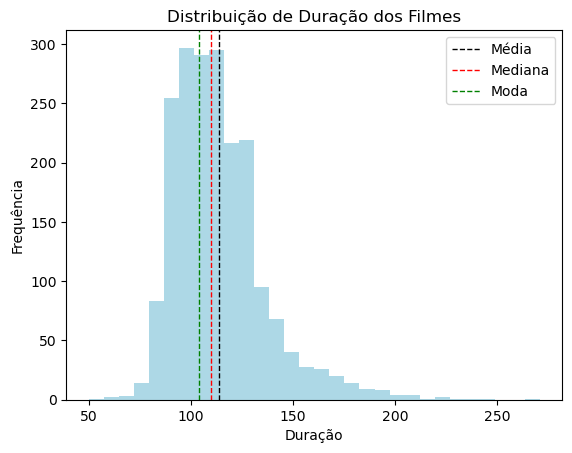

In [16]:
# Plotando o histograma da feature 'Duration', destacando a média, mediana e moda
plt.hist(df['Duration'], bins=30, color='lightblue')
plt.axvline(mediaDuracao, color='black', linestyle='dashed', linewidth=1)
plt.axvline(medianaDuracao, color='red', linestyle='dashed', linewidth=1)
plt.axvline(modaDuracao[0][0], color='green', linestyle='dashed', linewidth=1)
# Adicionando legenda
plt.legend({'Média':mediaDuracao,'Mediana':medianaDuracao,'Moda':modaDuracao[0][0]})
plt.title('Distribuição de Duração dos Filmes')
plt.xlabel('Duração')
plt.ylabel('Frequência')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x23a40744110>,
 'caps': [<matplotlib.lines.Line2D at 0x23a400535d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23a3fe3b850>],
 'medians': [<matplotlib.lines.Line2D at 0x23a400522d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23a40053790>],
 'means': []}

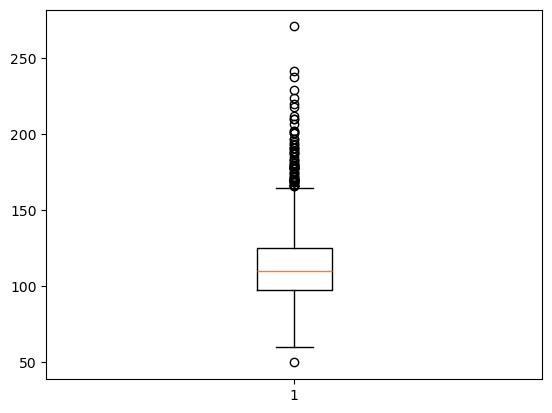

In [17]:
# Plotando o boxplot da feature 'IMDB Rating'
plt.boxplot(df['Duration'])

##### Removendo Outliers

In [18]:
# Encontrando os outliers da feature 'Duration' com IQR
Q1 = df['Duration'].quantile(0.25)      
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
outliersIQR = df[(df['Duration'] < (Q1 - 1.5 * IQR)) | (df['Duration'] > (Q3 + 1.5 * IQR))]['Duration']
print('Quantidade de Outliers:', len(outliersIQR))

Quantidade de Outliers: 72


In [19]:
# Encontrando os outliers da feature 'Duration' com 3 desvios padrões
outliersDP = df[np.abs(stats.zscore(df['Duration'])) > 3]['Duration']
print('Quantidade de Outliers:', len(outliersDP))

Quantidade de Outliers: 32


In [20]:
# Vetor com os outliers diferentes encontrados com IQR e 3 desvios padrões
outliersDif = np.unique(np.concatenate((outliersIQR, outliersDP)))
print('Quantidade de Outliers:', len(outliersDif))

Quantidade de Outliers: 36


Sim, existem pontos que são classificados como outliers por apenas um dos métodos.

In [21]:
# Removendo os outliers da feature 'Duration'
df = df[~df['Duration'].isin(outliersIQR)]

In [22]:
# Analisando como as medidas de posição mudaram após a remoção dos outliers
mediaDuracaoSO = df['Duration'].mean()
medianaDuracaoSO = df['Duration'].median()
modaDuracaoSO = stats.mode(df['Duration'], keepdims=True)

# Printando as estatísticas com outliers
print('Média com Outliers:', mediaDuracao)
print('Mediana com Outliers:', medianaDuracao)
print('Moda com Outliers:', modaDuracao[0][0])

# Deixando o print mais bonito
print('---'*10)

# Printando as estatísticas sem outliers
print('Média sem Outliers:', mediaDuracaoSO)
print('Mediana sem Outliers:', medianaDuracaoSO)
print('Moda sem Outliers:', modaDuracaoSO[0][0])

# Deixando o print mais bonito
print('---'*10)

# Printando as diferenças
print('Diff Média:', mediaDuracao - mediaDuracaoSO)
print('Diff Mediana:', medianaDuracao - medianaDuracaoSO)
print('Diff Moda:', modaDuracao[0][0] - modaDuracaoSO[0][0])

Média com Outliers: 113.939
Mediana com Outliers: 110.0
Moda com Outliers: 104
------------------------------
Média sem Outliers: 111.28578838174273
Mediana sem Outliers: 109.0
Moda sem Outliers: 104
------------------------------
Diff Média: 2.6532116182572594
Diff Mediana: 1.0
Diff Moda: 0


In [23]:
# Analisando como as medidas de dispersão mudaram após a remoção dos outliers
varianciaDuracaoSO = df['Duration'].var()
desvioPadraoDuracaoSO = df['Duration'].std()

# Printando as estatísticas com outliers
print('Variância com Outliers:', varianciaDuracao)
print('Desvio Padrão com Outliers:', desvioPadraoDuracao)

# Deixando o print mais bonito
print('---'*10)

# Printando as estatísticas sem outliers
print('Variância sem Outliers:', varianciaDuracaoSO)
print('Desvio Padrão sem Outliers:', desvioPadraoDuracaoSO)

# Deixando o print mais bonito
print('---'*10)

# Printando as diferenças
print('Diff Variância:', varianciaDuracao - varianciaDuracaoSO)
print('Diff Desvio Padrão:', desvioPadraoDuracao - desvioPadraoDuracaoSO)

Variância com Outliers: 526.5205392696336
Desvio Padrão com Outliers: 22.946035371489202
------------------------------
Variância sem Outliers: 325.6811264149766
Desvio Padrão sem Outliers: 18.04663753764054
------------------------------
Diff Variância: 200.83941285465698
Diff Desvio Padrão: 4.8993978338486635


#### IMDB Rating

##### Média, Mediana, Moda - Variância, Desvio Padrão e z-score

In [24]:
# Calculando a média, mediana e moda da feature 'IMDB Rating'
mediaIMDB = df['IMDB Rating'].mean()
medianaIMDB = df['IMDB Rating'].median()
modaIMDB = stats.mode(df['IMDB Rating'], keepdims=True)

# Calculando a variância e o desvio padrão da feature 'IMDB Rating'
varianciaIMDB = df['IMDB Rating'].var()
desvioPadraoIMDB = df['IMDB Rating'].std()

# Calculando o z-score da feature 'IMDB Rating'
zScoreIMDB = stats.zscore(df['IMDB Rating'])

# Printando as estatísticas
print('Média:', mediaIMDB)
print('Mediana:', medianaIMDB)
# A moda retorna um array com a moda e a quantidade de vezes que ela aparece
print('Moda - IMDB Rating:', modaIMDB[0][0], 'Quantidade:', modaIMDB[1][0])
print('Variância:', varianciaIMDB)
print('Desvio Padrão:', desvioPadraoIMDB)
print('Z-Score:', zScoreIMDB)

Média: 6.886981327800829
Mediana: 7.0
Moda - IMDB Rating: 7.2 Quantidade: 101
Variância: 0.8947603691374103
Desvio Padrão: 0.9459177390964874
Z-Score: 2       0.859725
4       0.542491
5       0.753981
7       0.859725
8       1.176960
          ...   
1995    0.331001
1996   -1.995386
1997   -0.409213
1998   -0.514958
1999   -0.937937
Name: IMDB Rating, Length: 1928, dtype: float64


##### Histograma e boxplot 

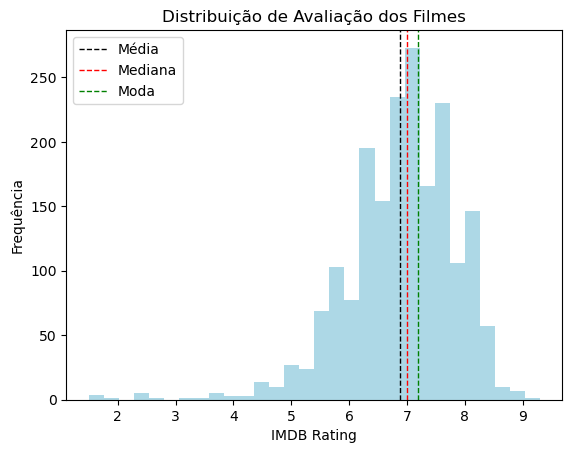

In [25]:
# Plotando o histograma da feature 'IMDB Rating', destacando a média, mediana e moda
plt.hist(df['IMDB Rating'], bins=30, color='lightblue')
plt.axvline(mediaIMDB, color='black', linestyle='dashed', linewidth=1)
plt.axvline(medianaIMDB, color='red', linestyle='dashed', linewidth=1)
plt.axvline(modaIMDB[0][0], color='green', linestyle='dashed', linewidth=1)
# Adicionando legenda
plt.legend({'Média':mediaIMDB,'Mediana':medianaIMDB,'Moda':modaIMDB[0][0]})
plt.title('Distribuição de Avaliação dos Filmes')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequência')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x23a4019d910>,
 'caps': [<matplotlib.lines.Line2D at 0x23a4019ead0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23a4019ced0>],
 'medians': [<matplotlib.lines.Line2D at 0x23a4019ff50>],
 'fliers': [<matplotlib.lines.Line2D at 0x23a401a8a10>],
 'means': []}

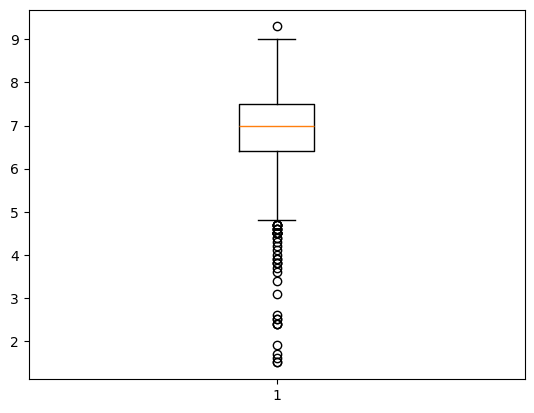

In [26]:
# Plotando o boxplot da feature 'IMDB Rating'
plt.boxplot(df['IMDB Rating'])

##### Removendo Outliers


In [27]:
# Encontrando os outliers da feature 'IMDB RAting' com IQR
Q1 = df['IMDB Rating'].quantile(0.25)      
Q3 = df['IMDB Rating'].quantile(0.75)
IQR = Q3 - Q1
outliersIQR = df[(df['IMDB Rating'] < (Q1 - 1.5 * IQR)) | (df['IMDB Rating'] > (Q3 + 1.5 * IQR))]['IMDB Rating']
print('Quantidade de Outliers:', len(outliersIQR))

Quantidade de Outliers: 45


In [28]:
# Encontrando os outliers da feature 'Duration' com 3 desvios padrões
outliersDP = df[np.abs(stats.zscore(df['IMDB Rating'])) > 3]['IMDB Rating']
print('Quantidade de Outliers:', len(outliersDP))

Quantidade de Outliers: 21


In [29]:
# Vetor com os outliers diferentes encontrados com IQR e 3 desvios padrões
outliersDif = np.unique(np.concatenate((outliersIQR, outliersDP)))
print('Quantidade de Outliers:', len(outliersDif))

Quantidade de Outliers: 22


Sim, existem pontos que são classificados como outliers por apenas um dos métodos.

In [30]:
# Removendo os outliers da feature 'IMDB Rating'
df = df[~df['IMDB Rating'].isin(outliersIQR)]

In [31]:
# Analisando como as medidas de posição mudaram após a remoção dos outliers
mediaIMDBSO = df['IMDB Rating'].mean()
medianaIMDBSO = df['IMDB Rating'].median()
modaIMDBSO = stats.mode(df['IMDB Rating'], keepdims=True)

# Printando as estatísticas com outliers
print('Média com Outliers:', mediaIMDB)
print('Mediana com Outliers:', medianaIMDB)
print('Moda com Outliers:', modaIMDB[0][0])

# Deixando o print mais bonito
print('---'*10)

# Printando as estatísticas sem outliers
print('Média sem Outliers:', mediaIMDBSO)
print('Mediana sem Outliers:', medianaIMDBSO)
print('Moda sem Outliers:', modaIMDBSO[0][0])

# Deixando o print mais bonito
print('---'*10)

# Printando as diferenças
print('Diff Média:', mediaIMDB - mediaIMDBSO)
print('Diff Mediana:', medianaIMDB - medianaIMDBSO)
print('Diff Moda:', modaIMDB[0][0] - modaIMDBSO[0][0])

Média com Outliers: 6.886981327800829
Mediana com Outliers: 7.0
Moda com Outliers: 7.2
------------------------------
Média sem Outliers: 6.959532660647902
Mediana sem Outliers: 7.0
Moda sem Outliers: 7.2
------------------------------
Diff Média: -0.07255133284707327
Diff Mediana: 0.0
Diff Moda: 0.0


In [32]:
# Analisando como as medidas de dispersão mudaram após a remoção dos outliers
varianciaIMDBSO = df['IMDB Rating'].var()
desvioPadraoIMDBSO = df['IMDB Rating'].std()

# Printando as estatísticas com outliers
print('Variância com Outliers:', varianciaIMDB)
print('Desvio Padrão com Outliers:', desvioPadraoIMDB)

# Deixando o print mais bonito
print('---'*10)

# Printando as estatísticas sem outliers
print('Variância sem Outliers:', varianciaIMDBSO)
print('Desvio Padrão sem Outliers:', desvioPadraoIMDBSO)

# Deixando o print mais bonito
print('---'*10)

# Printando as diferenças
print('Diff Variância:', varianciaIMDB - varianciaIMDBSO)
print('Diff Desvio Padrão:', desvioPadraoIMDB - desvioPadraoIMDBSO)

Variância com Outliers: 0.8947603691374103
Desvio Padrão com Outliers: 0.9459177390964874
------------------------------
Variância sem Outliers: 0.6492860726574732
Desvio Padrão sem Outliers: 0.8057828942447669
------------------------------
Diff Variância: 0.24547429647993713
Diff Desvio Padrão: 0.14013484485172045


#### Verificando se existe algum atributo com Variância nula ou próxima de zero

In [33]:
# Calculando a variância para os demais atributos numéricos
varianciaMetascore = df['Metascore'].var()
varianciaVotes = df['Votes'].var()
varianciaGross = df['Gross'].var()

# Printando as variâncias
print('Variância Duration:', varianciaDuracao)
print('Variância IMDB Rating:', varianciaIMDB)
print('Variância Metascore:', varianciaMetascore)
print('Variância Votes:', varianciaVotes)
print('Variância Gross:', varianciaGross)


Variância Duration: 526.5205392696336
Variância IMDB Rating: 0.8947603691374103
Variância Metascore: 288.3121459304581
Variância Votes: 65340407621.11984
Variância Gross: 4869.085336672149


A variância mais próxima de 0 é a do atributo 'IMDB Rating'

### Transformação de Dados

#### Numéricos

##### Normalização

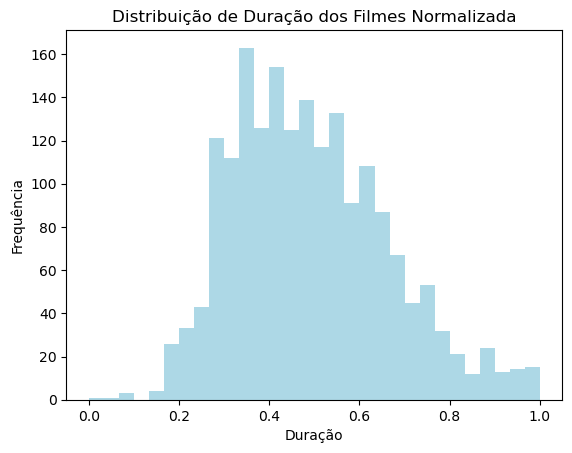

In [34]:
# Normalizando a feature 'Duration' usando o scikit
from sklearn.preprocessing import MinMaxScaler

# Instanciando o MinMaxScaler
scaler = MinMaxScaler()

# Normalizando a feature 'Duration'
df['Duration'] = scaler.fit_transform(df[['Duration']])

# Plotando o histograma da feature 'Duration' normalizada
plt.hist(df['Duration'], bins=30, color='lightblue')
plt.title('Distribuição de Duração dos Filmes Normalizada')
plt.xlabel('Duração')
plt.ylabel('Frequência')
plt.show()

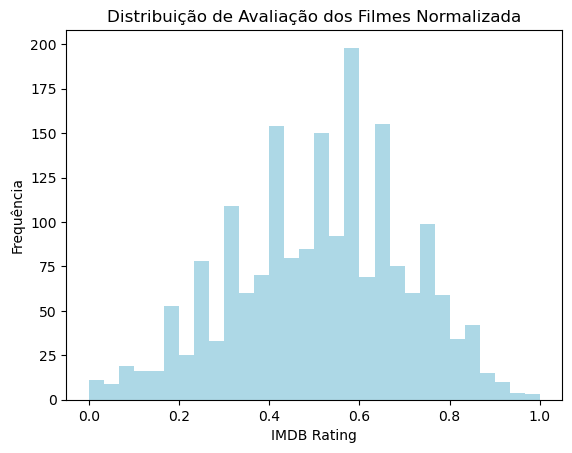

In [35]:
# Normalizando a feature 'IMDB Rating' usando o scikit
# Instanciando o MinMaxScaler
scaler = MinMaxScaler()

# Normalizando a feature 'IMDB Rating'
df['IMDB Rating'] = scaler.fit_transform(df[['IMDB Rating']])
# Plotando o histograma da feature 'IMDB Rating' normalizada
plt.hist(df['IMDB Rating'], bins=30, color='lightblue')
plt.title('Distribuição de Avaliação dos Filmes Normalizada')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequência')
plt.show()

##### Padronização

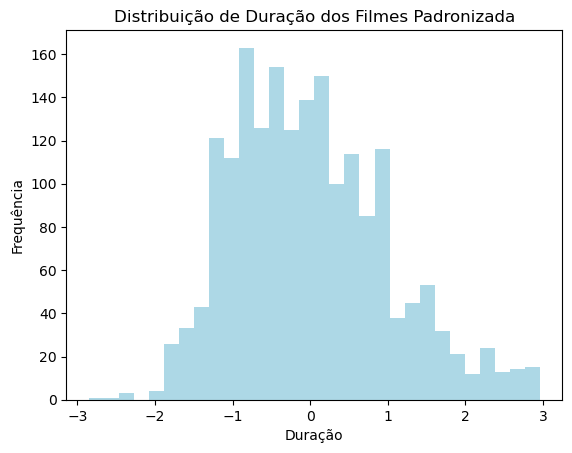

In [36]:
# Padronizando a feature 'Duration' usando o scikit
from sklearn.preprocessing import StandardScaler

# Instanciando o StandardScaler
scaler = StandardScaler()

# Padronizando a feature 'Duration'
df['Duration'] = scaler.fit_transform(df[['Duration']])
# Plotando o histograma da feature 'Duration' padronizada
plt.hist(df['Duration'], bins=30, color='lightblue')
plt.title('Distribuição de Duração dos Filmes Padronizada')
plt.xlabel('Duração')
plt.ylabel('Frequência')
plt.show()

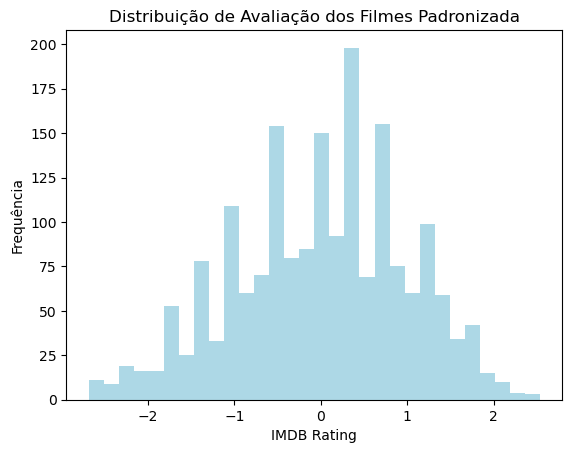

In [37]:
# Padronizando a feature 'IMDB Rating' usando o scikit
# Instanciando o StandardScaler
scaler = StandardScaler()

# Padronizando a feature 'IMDB Rating'
df['IMDB Rating'] = scaler.fit_transform(df[['IMDB Rating']])
# Plotando o histograma da feature 'IMDB Rating' padronizada
plt.hist(df['IMDB Rating'], bins=30, color='lightblue')
plt.title('Distribuição de Avaliação dos Filmes Padronizada')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequência')
plt.show()

##### Padronização com IQR

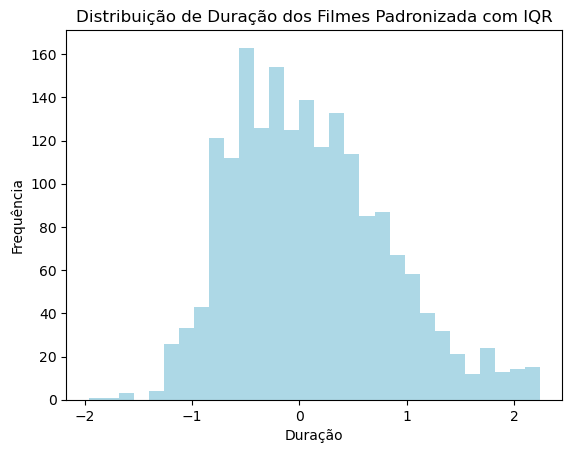

In [38]:
# Padronizando com IQR a feature 'Duration' usando o scikit
from sklearn.preprocessing import RobustScaler

# Instanciando o RobustScaler
scaler = RobustScaler()

# Padronizando a feature 'Duration'
df['Duration'] = scaler.fit_transform(df[['Duration']])
# Plotando o histograma da feature 'Duration' padronizada
plt.hist(df['Duration'], bins=30, color='lightblue')
plt.title('Distribuição de Duração dos Filmes Padronizada com IQR')
plt.xlabel('Duração')
plt.ylabel('Frequência')
plt.show()

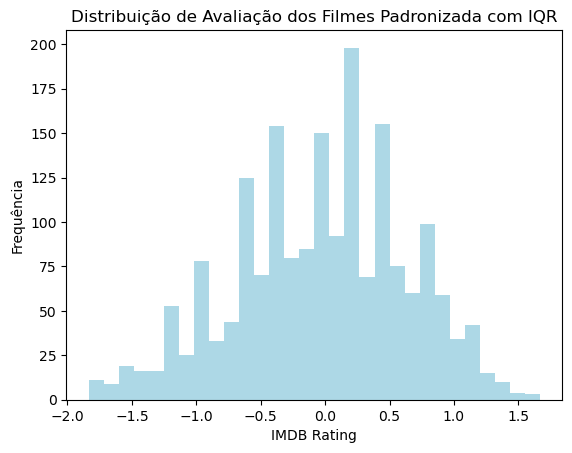

In [39]:
# Padronizando com IQR a feature 'IMDB Rating' usando o scikit
# Instanciando o RobustScaler
scaler = RobustScaler()

# Padronizando a feature 'IMDB Rating'
df['IMDB Rating'] = scaler.fit_transform(df[['IMDB Rating']])
# Plotando o histograma da feature 'IMDB Rating' padronizada
plt.hist(df['IMDB Rating'], bins=30, color='lightblue')
plt.title('Distribuição de Avaliação dos Filmes Padronizada com IQR')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequência')
plt.show()

#### Categóricos

##### Codificação ordinal
Usarei a codificação ordinal no atributo 'Release Year'. Dessa forma, o elemento mais velho terá o menor valor e o elemento mais novo terá o maior valor.

In [40]:
# Importando a biblioteca
from sklearn.preprocessing import OrdinalEncoder

# Instanciando o OrdinalEncoder
encoder = OrdinalEncoder()

# Codificando 'Release Year'
df['Release Year'] = encoder.fit_transform(df[['Release Year']])

df.head()


,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
2,Ordinary People,48.0,0.60,0.583333,86.0,56476,Drama,Robert Redford,Donald Sutherland,54.80
4,Straw Dogs,39.0,0.16,0.333333,73.0,64331,"Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,44.82
5,Close Encounters of the Third Kind,45.0,1.16,0.500000,90.0,216050,"Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,132.09
7,The Dirty Dozen,35.0,1.64,0.583333,73.0,78858,"Action, Adventure, War",Robert Aldrich,Lee Marvin,45.30
8,Rosemary's Baby,36.0,1.12,0.833333,96.0,234034,"Drama, Horror",Roman Polanski,Mia Farrow,44.82


##### One Hot Encoding
(Filmes com mais de um gênero foram classificados conforme o primeiro gênero listado)

In [41]:
df_copia = df
# Formatando Genre
df_copia['Genre'] = df_copia['Genre'].str.split(', ').str[0]
one_hot = pd.get_dummies(df_copia['Genre'], drop_first=False)

# Dropando a coluna 'Genre'
df_copia = df_copia.drop('Genre', axis=1)

# Concatenando o one-hot encoding com o dataset original
df_copia = pd.concat([df_copia, one_hot], axis=1)

display(df_copia.iloc[4])

Movie Name      Rosemary's Baby
Release Year               36.0
Duration                   1.12
IMDB Rating            0.833333
Metascore                  96.0
Votes                    234034
Director         Roman Polanski
Cast                 Mia Farrow
Gross                     44.82
Action                    False
Adventure                 False
Animation                 False
Biography                 False
Comedy                    False
Crime                     False
Documentary               False
Drama                      True
Family                    False
Fantasy                   False
Film-Noir                 False
Horror                    False
Mystery                   False
Sci-Fi                    False
Thriller                  False
Western                   False
Name: 8, dtype: object

##### Variável dummy
Muito semelhante ao One Hot Encoding, mas possui um elemento a menos no array, portanto, drop_first = TRUE <br> No caso, Action ocorre quando todos são falsos

In [42]:
# Formatando Genre
df['Genre'] = df['Genre'].str.split(', ').str[0]
one_hot = pd.get_dummies(df['Genre'], drop_first=True)

# Dropando a coluna 'Genre'
df = df.drop('Genre', axis=1)

# Concatenando o one-hot encoding com o dataset original
df = pd.concat([df, one_hot], axis=1)

# Mostrando um filme de ação em que todos os demais gêneros são falsos
display(df.iloc[3])

Movie Name      The Dirty Dozen
Release Year               35.0
Duration                   1.64
IMDB Rating            0.583333
Metascore                  73.0
Votes                     78858
Director         Robert Aldrich
Cast                 Lee Marvin
Gross                      45.3
Adventure                 False
Animation                 False
Biography                 False
Comedy                    False
Crime                     False
Documentary               False
Drama                     False
Family                    False
Fantasy                   False
Film-Noir                 False
Horror                    False
Mystery                   False
Sci-Fi                    False
Thriller                  False
Western                   False
Name: 7, dtype: object